In [17]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
    
paths = [f.path for f in os.scandir('target/criterion/') if f.is_dir()]
paths.remove('target/criterion/report')

report = {}

for path in paths:
    print(path)
    path_end = path.split('/')[-1].split(' ')
    function_name = path_end[0]
        
    size_paths = [f.path for f in os.scandir(path) if f.is_dir() and not f.path.endswith('report')]
        
    for size_path in size_paths:
        print(size_path)
        size = int(size_path.split('/')[-1])
        with open(os.path.join(size_path, 'base', 'estimates.json'), 'r') as f:
            data = json.load(f)
            
            if function_name not in report:
                report[function_name] = {}
                            
            report[function_name][size] = data['median']['point_estimate']
        

target/criterion/cost_index_of
target/criterion/cost_index_of/1
target/criterion/cost_fetch_var
target/criterion/cost_fetch_var/396
target/criterion/cost_fetch_var/32
target/criterion/cost_fetch_var/504
target/criterion/cost_fetch_var/216
target/criterion/cost_fetch_var/288
target/criterion/cost_fetch_var/256
target/criterion/cost_fetch_var/180
target/criterion/cost_fetch_var/16
target/criterion/cost_fetch_var/324
target/criterion/cost_fetch_var/144
target/criterion/cost_fetch_var/1
target/criterion/cost_fetch_var/8
target/criterion/cost_fetch_var/72
target/criterion/cost_fetch_var/128
target/criterion/cost_fetch_var/36
target/criterion/cost_fetch_var/360
target/criterion/cost_fetch_var/108
target/criterion/cost_fetch_var/64
target/criterion/cost_fetch_var/468
target/criterion/cost_fetch_var/432
target/criterion/cost_fetch_var/252
target/criterion/cost_fetch_var/576
target/criterion/cost_fetch_var/540
target/criterion/cost_fetch_var/2
target/criterion/cost_hash160
target/criterion/cost

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.DataFrame(report)
df

,cost_index_of,cost_fetch_var,cost_hash160,cost_analysis_type_check,cost_fetch_entry,cost_print,cost_set_var,cost_set_entry
1,167816.349513,702053.271309,159486.898863,2.972181e+03,656524.529827,588688.654762,331056.457706,734324.236098
32,NaN,316607.915556,NaN,3.581697e+05,NaN,NaN,369980.909754,NaN
256,NaN,353501.484634,NaN,NaN,NaN,NaN,403017.320302,NaN
16,NaN,302220.127566,NaN,1.205646e+05,NaN,NaN,370270.864223,NaN
8,NaN,376862.060408,NaN,4.996590e+04,NaN,NaN,381897.656635,NaN
128,NaN,342918.961111,NaN,6.061472e+06,NaN,NaN,374071.035737,NaN
64,NaN,337173.995370,NaN,1.518578e+06,NaN,NaN,369197.523816,NaN
2,NaN,312145.369234,NaN,1.235770e+04,NaN,NaN,340060.788924,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,361216.465077,NaN
160,NaN,NaN,NaN,NaN,NaN,NaN,361296.699405,NaN


In [11]:
def estimate_params(df, name, transform):
    X = df.index.values.reshape(-1, 1)
    Y = df[name].values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))].reshape(-1, 1)
    Y = Y[np.logical_not(np.isnan(Y))]
    X = transform(X)
#     Y = transform(Y)

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    b = linear_regressor.intercept_
    if b < 0:
        b = max(Y[0] - linear_regressor.coef_, 0)
    a = linear_regressor.coef_
    
    return (a, b)
    
def logn(n):
    return np.log2(n)

def nlogn(n):
    return n * np.log2(n)

def plot(df, name, a, b, transform):
    Y = df[name].values.reshape(-1, 1)
    X = df.index.values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))]
    X = transform(X)
    Y = Y[np.logical_not(np.isnan(Y))]
    
    y_pred = a*X + b
    
    plt.scatter(X, Y, color='orange')
    plt.suptitle(name)
    plt.plot(X, y_pred, color='blue')
    plt.show()

def estimate_plot(df, fun_name, output, transform = lambda x: x):
    a, b = estimate_params(df, fun_name, transform)
    print(a, b)
#     output.loc[fun_name] = [a.squeeze(), b.squeeze()]
    if not isinstance(a, int):
        a = a.squeeze()
    if not isinstance(b, int):
        b = b.squeeze()
    output.loc[fun_name] = [a, b]
    plot(df, fun_name, a, b, transform)

[1201.44631562] 153720.86048490263


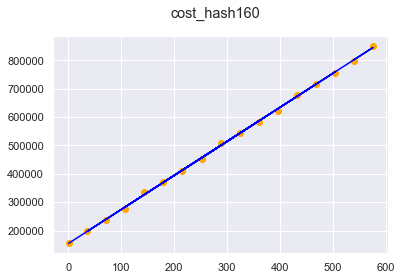

[0.] 588688.6547619047


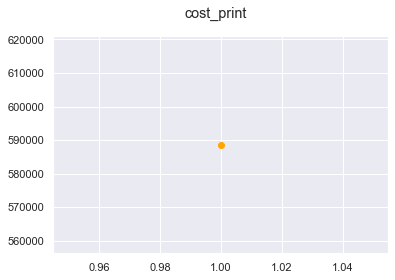

[0.] 656524.5298268588


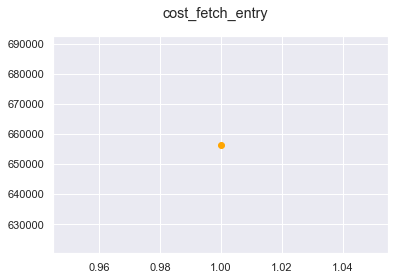

[0.] 734324.2360982392


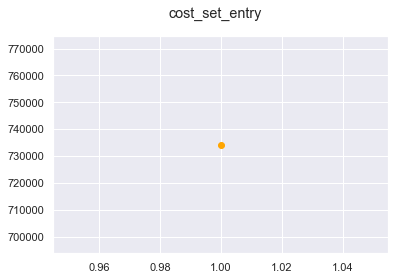

[-318.70637788] 400633.41484637605


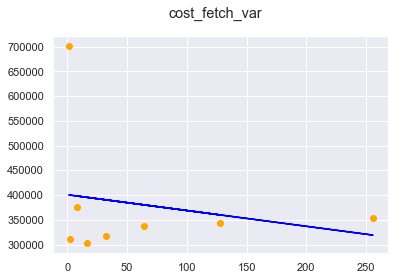

[8.27448359] 366302.5082772876


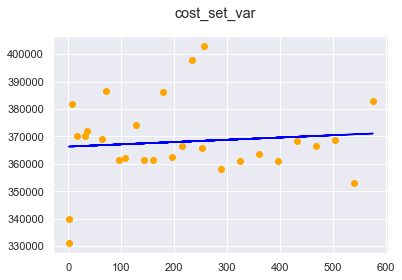

,a,b
cost_hash160,1201.4463156172108,153720.860485
cost_print,0.0,588688.654762
cost_fetch_entry,0.0,656524.529827
cost_set_entry,0.0,734324.236098
cost_fetch_var,-318.7063778756812,400633.414846
cost_set_var,8.274483587084339,366302.508277


In [21]:
output = pd.DataFrame(columns=["a", "b"])

# estimate_plot(df, 'cost_analysis_type_annotate', output)
# estimate_plot(df, 'cost_analysis_type_check', output)
# estimate_plot(df, 'cost_analysis_type_lookup', output)
# estimate_plot(df, 'cost_analysis_visit', output)
# estimate_plot(df, 'cost_analysis_iterable_func', output)
# estimate_plot(df, 'cost_analysis_option_cons', output)
# estimate_plot(df, 'cost_analysis_option_check', output)
# estimate_plot(df, 'cost_analysis_bind_name', output)
# estimate_plot(df, 'cost_analysis_list_items_check', output)
# estimate_plot(df, 'cost_analysis_check_tuple_get', output, nlogn)
# # estimate_plot(df, 'cost_analysis_check_tuple_merge ', output)
# estimate_plot(df, 'cost_analysis_check_tuple_cons', output, nlogn)
# estimate_plot(df, 'cost_analysis_tuple_items_check', output)
# estimate_plot(df, 'cost_analysis_check_let', output)
# estimate_plot(df, 'cost_analysis_lookup_function', output)
# estimate_plot(df, 'cost_analysis_lookup_function_types', output)
# estimate_plot(df, 'cost_analysis_lookup_variable_const', output)
# estimate_plot(df, 'cost_analysis_lookup_variable_depth', output, nlogn)
# estimate_plot(df, 'cost_arithmetic_only_checker', output)
# estimate_plot(df, 'cost_read_only', output)
# estimate_plot(df, 'cost_trait_checker', output)
# estimate_plot(df, 'cost_type_checker', output)
# estimate_plot(df, 'cost_ast_parse', output)
# estimate_plot(df, 'cost_ast_cycle_detection', output)
# estimate_plot(df, 'cost_analysis_storage', output)
# estimate_plot(df, 'cost_analysis_use_trait_entry', output)
# estimate_plot(df, 'cost_analysis_get_function_entry', output)
# # do we have a benchmark for this?
# # estimate_plot(df, 'cost_analysis_fetch_contract_entry', output)
# estimate_plot(df, 'cost_lookup_variable_depth', output)
# estimate_plot(df, 'cost_lookup_variable_size', output)
# estimate_plot(df, 'cost_lookup_function', output)
# estimate_plot(df, 'cost_bind_name', output)
# estimate_plot(df, 'cost_inner_type_check_cost', output)
# estimate_plot(df, 'cost_user_function_application', output)
# estimate_plot(df, 'cost_let', output)
# estimate_plot(df, 'cost_if', output)
# estimate_plot(df, 'cost_asserts', output)
# estimate_plot(df, 'cost_map', output)
# estimate_plot(df, 'cost_filter', output)
# estimate_plot(df, 'cost_len', output)
# estimate_plot(df, 'cost_element_at', output)
# estimate_plot(df, 'cost_index_of', output)
# estimate_plot(df, 'cost_fold', output)
# estimate_plot(df, 'cost_list_cons', output)
# estimate_plot(df, 'cost_type_parse_step', output)
# estimate_plot(df, 'cost_tuple_get', output, nlogn)
# estimate_plot(df, 'cost_tuple_merge', output)
# estimate_plot(df, 'cost_tuple_cons', output, nlogn)
# estimate_plot(df, 'cost_add', output)
# estimate_plot(df, 'cost_sub', output)
# estimate_plot(df, 'cost_mul', output)
# estimate_plot(df, 'cost_div', output)
# estimate_plot(df, 'cost_geq', output)
# estimate_plot(df, 'cost_leq', output)
# estimate_plot(df, 'cost_le', output)
# estimate_plot(df, 'cost_ge', output)
# estimate_plot(df, 'cost_int_cast', output)
# estimate_plot(df, 'cost_mod', output)
# estimate_plot(df, 'cost_pow', output)
# estimate_plot(df, 'cost_sqrti', output)
# estimate_plot(df, 'cost_log2', output)
# estimate_plot(df, 'cost_xor', output)
# estimate_plot(df, 'cost_not', output)
# estimate_plot(df, 'cost_eq', output)
# estimate_plot(df, 'cost_begin', output)
estimate_plot(df, 'cost_hash160', output)
# estimate_plot(df, 'cost_sha256', output)
# estimate_plot(df, 'cost_sha512', output)
# estimate_plot(df, 'cost_sha512t256', output)
# estimate_plot(df, 'cost_keccak256', output)
# estimate_plot(df, 'cost_secp256k1recover', output)
# estimate_plot(df, 'cost_secp256k1verify', output)
estimate_plot(df, 'cost_print', output)
# estimate_plot(df, 'cost_some_cons', output)
# estimate_plot(df, 'cost_ok_cons', output)
# estimate_plot(df, 'cost_err_cons', output)
# estimate_plot(df, 'cost_default_to', output)
# estimate_plot(df, 'cost_unwrap_ret', output)
# estimate_plot(df, 'cost_unwrap_err_or_ret', output)
# estimate_plot(df, 'cost_is_okay', output)
# estimate_plot(df, 'cost_is_none', output)
# estimate_plot(df, 'cost_is_err', output)
# estimate_plot(df, 'cost_is_some', output)
# estimate_plot(df, 'cost_unwrap', output)
# estimate_plot(df, 'cost_unwrap_err', output)
# estimate_plot(df, 'cost_try_ret', output)
# estimate_plot(df, 'cost_match', output)
# estimate_plot(df, 'cost_or', output)
# estimate_plot(df, 'cost_and', output)
# estimate_plot(df, 'cost_append', output)
# estimate_plot(df, 'cost_concat', output)
# estimate_plot(df, 'cost_as_max_len', output)
# estimate_plot(df, 'cost_contract_call', output)
# estimate_plot(df, 'cost_contract_of', output)
# estimate_plot(df, 'cost_principal_of', output)
# estimate_plot(df, 'cost_at_block', output)
# estimate_plot(df, 'cost_load_contract', output)
# estimate_plot(df, 'cost_create_map', output)
# estimate_plot(df, 'cost_create_var', output)
# estimate_plot(df, 'cost_create_nft', output)
# estimate_plot(df, 'cost_create_ft', output)
estimate_plot(df, 'cost_fetch_entry', output)
estimate_plot(df, 'cost_set_entry', output)
estimate_plot(df, 'cost_fetch_var', output)
estimate_plot(df, 'cost_set_var', output)
# estimate_plot(df, 'cost_contract_storage', output)
# estimate_plot(df, 'cost_block_info', output)
# estimate_plot(df, 'cost_stx_balance', output)
# estimate_plot(df, 'cost_stx_transfer', output)
# estimate_plot(df, 'cost_ft_mint', output)
# estimate_plot(df, 'cost_ft_transfer', output)
# estimate_plot(df, 'cost_ft_balance', output)
# estimate_plot(df, 'cost_nft_mint', output)
# estimate_plot(df, 'cost_nft_transfer', output)
# estimate_plot(df, 'cost_nft_owner', output)
# estimate_plot(df, 'cost_ft_get_supply', output)
# estimate_plot(df, 'cost_ft_burn', output)
# estimate_plot(df, 'cost_nft_burn', output)
# estimate_plot(df, 'poison_microblock', output)

output

In [5]:
output.to_csv("cost_constants.csv")

In [9]:
71241.3539776112 2.126736e+07

SyntaxError: invalid syntax (<ipython-input-9-1110dabad65a>, line 1)